In [310]:
import os
os.getcwd()

'/Users/pushkarsinghbhauryal/Downloads'

In [311]:
import pandas as pd
import numpy as np
pd.options.display.max_columns=None


In [312]:
data_portugal= pd.read_excel('portugal_data.xlsx')

In [313]:
data_portugal.columns

Index(['build_region_id', 'build_region_name', 'fips', 'county_name', 'area',
       'New_county_name', 'Lattitude', 'Longitude', 'Area', 'Population',
       '#Municipalities', 'Population Density', 'CPP'],
      dtype='object')

In [314]:
#columns= ['build_region_name','Area','Population','#Municipalities','Population Density','CPP']
columns= ['Area','Population','#Municipalities','Population Density','CPP']

In [315]:
data_portugal=data_portugal[columns]


In [316]:
data=pd.get_dummies(data_portugal,drop_first=True)
data

,Area,Population,#Municipalities,Population Density,CPP
0,42.17,5483,1,130.021342,80
1,741.00,267785,10,361.383266,80
2,5064.00,851258,13,168.099921,100
3,6747.00,453638,21,67.235512,92
4,2761.00,2250533,16,815.115176,120
5,173.06,14994,1,86.640472,80
6,96.89,5552,1,57.302095,80
7,60.65,4391,1,72.399011,80
8,400.60,56437,2,140.881178,80
9,447.00,14148,3,31.651007,80


In [317]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [318]:
scaler = MinMaxScaler()
data=scaler.fit_transform(data)

In [319]:
k = range(2,10)
score= []

In [320]:
for i in k:
    clusterer = KMeans(random_state = 23,n_clusters=i)
    clusterer.fit(data)
# TODO: Predict the cluster for each data point
    preds = clusterer.predict(data)
    coff= silhouette_score(data,preds)
    score.append(coff)
score

[0.479829111904608,
 0.5706014337521137,
 0.48310139860792417,
 0.45400395315148895,
 0.4646955375834773,
 0.4721961519548042,
 0.46530568853363913,
 0.42219532317111513]

In [321]:
clusterer = KMeans(random_state = 23,n_clusters=3)
clusterer.fit(data)
preds = clusterer.predict(data)

In [322]:
import matplotlib.pyplot as plt
%matplotlib notebook 

In [323]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


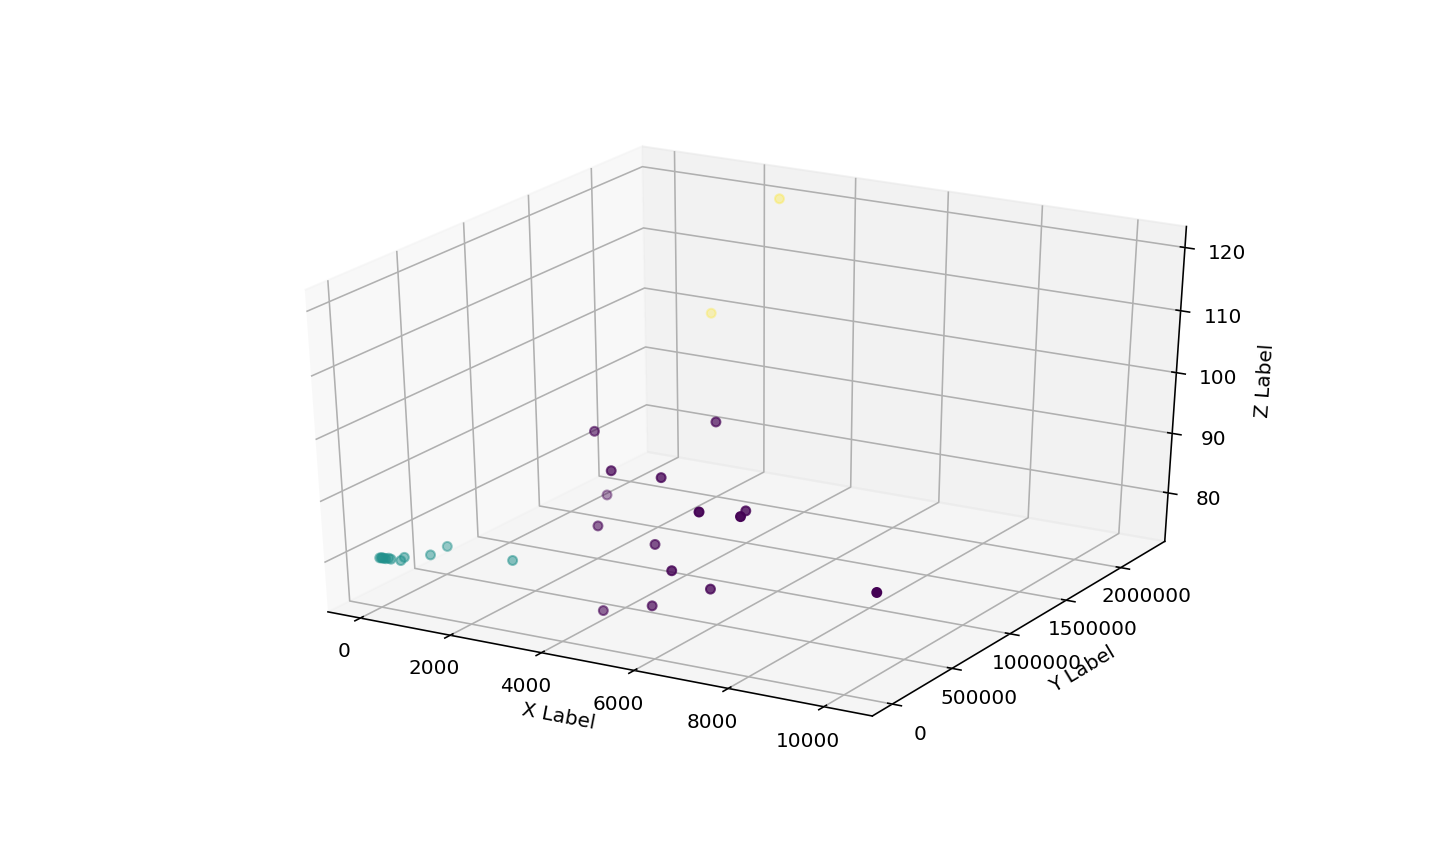

In [324]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_portugal.Area,data_portugal.Population,data_portugal.CPP,marker='o',c=preds)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [325]:
# fig = plt.figure(figsize=(10,6))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(data_portugal['#Municipalities'],data_portugal['Population Density'],data_portugal.CPP,marker='o',c=preds)

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')


# plt.show()

In [326]:
preds

array([1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [327]:
#data_portugal['Cluster']= list(preds)

In [304]:
# log_data= np.log(data_portugal)

In [305]:
# log_scaled= scaler.fit_transform(log_data)

In [306]:
# k = range(2,10)
# score1= []
# for i in k:
#     clusterer = KMeans(random_state = 23,n_clusters=i)
#     clusterer.fit(log_scaled)
# # TODO: Predict the cluster for each data point
#     preds = clusterer.predict(log_scaled)
#     coff= silhouette_score(log_scaled,preds)
#     score1.append(coff)
# score1

[0.5480169258639732,
 0.41216236640192155,
 0.4436348398515786,
 0.4454684100537664,
 0.3621378733095415,
 0.34442774554201305,
 0.37607689267776967,
 0.3763269097068047]

In [307]:
# k = range(2,10)
# score2= []
# for i in k:
#     clusterer = KMeans(random_state = 23,n_clusters=i)
#     clusterer.fit(log_data)
# # TODO: Predict the cluster for each data point
#     preds = clusterer.predict(log_data)
#     coff= silhouette_score(log_data,preds)
#     score2.append(coff)
# score2

[0.629510575089204,
 0.46832544640689416,
 0.40849689827509844,
 0.4478809574572005,
 0.461611447799166,
 0.43277883504887893,
 0.4205982252097552,
 0.4337425172400887]

In [308]:
# clusterer = KMeans(random_state = 23,n_clusters=2)
# clusterer.fit(log_data)
# # TODO: Predict the cluster for each data point
# preds = clusterer.predict(log_data)

In [328]:
# fig = plt.figure(figsize=(10,6))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(data_portugal['#Municipalities'],data_portugal['Population Density'],data_portugal.CPP,marker='o',c=preds)

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')


# plt.show()